# EASE & ItemKNN with AddressaOneWeek Dataset and StrongGeneralization & TimedLastItemPrediction Scenario

In this notebook, the experiment of EASE & ItemKNN in RecPack will be presented. 
The notebook contains:

1. The 10% of AddressaOneWeek Dataset from RecPack.
2. The StrongGeneralization & TimedLastItemPrediction Scenario to split the data.
3. The RecPack Pipeline Builder to run the experiments, including the splitted dataset, the algorithms and metrics to run. Hyperparameter has been performed in the Pipeline.

Please make sure you have installed all the latest libraries in your Python environment, in order to have a successful run of the code.

In [1]:
from recpack.datasets import Netflix, DummyDataset
from recpack.pipelines import PipelineBuilder
from recpack.scenarios import StrongGeneralization, TimedLastItemPrediction, WeakGeneralization
from recpack.pipelines import ALGORITHM_REGISTRY
import pandas as pd

In [2]:
from recpack.datasets import AdressaOneWeek
dataset = AdressaOneWeek()

In [3]:
dataset.fetch_dataset()

In [4]:
dataset

In [5]:
df = dataset._load_dataframe()
#df = dataset.load()

## Datasets with Timestamps sampling

In [7]:
timestamp_counts = df['time'].value_counts().sort_index(ascending=False)
cumulative_counts = timestamp_counts.cumsum()
total_counts = cumulative_counts.max()
threshold_count = total_counts * 0.1
threshold_timestamp = cumulative_counts[cumulative_counts >= threshold_count].index[0]

In [8]:
filtered_df = df[df['time'] >= threshold_timestamp]

In [20]:
df

,userId,id,time
0,cx:2fs9x8i7jvcjyckoxqfa6l4lw:3rr1gvpcbzx8w,9f3999bd1a1a8d67bcb073ad54840f15cb30f014,1483225202
1,cx:2u0wp23pfgjcc12gorbv6mp6tp:1l4jele4s191,f21680b77830223807e4847b3307e6ffa1e175ed,1483225203
2,cx:kfubh0ub7g8z3g5mgndoaljqd:1w4rvohza6x7d,2607fc7d7b4c0ede839a5ff6d499fa428237443e,1483225203
3,cx:hua808o791zl6cx9:3s9kdckn8su34,68d1503c73ad169dcfff48214fd0274c4d612e63,1483225204
4,cx:1s8dobcz77bgl3jozo9wdodu0t:2h45sh9wqlrpp,68d1503c73ad169dcfff48214fd0274c4d612e63,1483225207
...,...,...,...
3101986,cx:9k87jvj35ts82aloy49wfxosg:952wl4r7sedv,d26dae18a47ee499c4aaca4a9b6017f1b5b1da13,1483830000
3101987,cx:ikird5ho7t08hlc6:2n6k9bd2ntk6v,8a3d76e1d7452ce38ae70fe900a9952be4305c63,1483830000
3101988,cx:2ry3bd6yl2fbb3mq9zs5cl4zvc:9oicxykjoyvo,faa8cc5200499acbf0f23f6b8e8f78b2b55d2c60,1483830001
3101989,cx:3c83unb96kkua3kw8jnflgge0n:1au0d7qhme3j5,4d44e61d966ed5a2c8b70a95eb9948aa2a10696f,1483830001


In [21]:
filtered_df

,userId,id,time
2791789,cx:2ren7oax3ikx1126uc6379p1m1:1ilgu73jr9354,9da08a8be1d6cf85b0c7cd3f40b774cba66960b8,1483745358
2791790,cx:13573746954421111340278:21n4bwo3o22w3,f28b18132dfe141356c778b1909f13fcded3c613,1483745358
2791791,cx:ehi4yx5vak421bv2uzvm0hz9m:2tfkglwogbje9,bb8ff8365233ea91dfcdb36fdd84f87fcc33e1a8,1483745358
2791792,cx:imiu917sfw8scsba:2b3kfu5odsixi,9de2fd10200602037cc938b038a0f7d3d5f8fb76,1483745359
2791793,cx:hu9xqbxb2q1op1a2:2bvkrtdex7gri,17a7ea777cb261130668d4314b1591f3767cd090,1483745359
...,...,...,...
3101986,cx:9k87jvj35ts82aloy49wfxosg:952wl4r7sedv,d26dae18a47ee499c4aaca4a9b6017f1b5b1da13,1483830000
3101987,cx:ikird5ho7t08hlc6:2n6k9bd2ntk6v,8a3d76e1d7452ce38ae70fe900a9952be4305c63,1483830000
3101988,cx:2ry3bd6yl2fbb3mq9zs5cl4zvc:9oicxykjoyvo,faa8cc5200499acbf0f23f6b8e8f78b2b55d2c60,1483830001
3101989,cx:3c83unb96kkua3kw8jnflgge0n:1au0d7qhme3j5,4d44e61d966ed5a2c8b70a95eb9948aa2a10696f,1483830001


In [9]:
from recpack.matrix import InteractionMatrix
from recpack.preprocessing.preprocessors import DataFramePreprocessor

item_ix = 'id'
user_ix = 'userId'
timestamp_ix = 'time'

preprocessor = DataFramePreprocessor(item_ix=item_ix, user_ix=user_ix, timestamp_ix=timestamp_ix)

interaction_matrix = preprocessor.process(filtered_df)

  0%|          | 0/310202 [00:00<?, ?it/s]

  0%|          | 0/310202 [00:00<?, ?it/s]

In [13]:
tt = interaction_matrix.timestamps.values[int(0.999 * len(interaction_matrix.timestamps.values))]

(array([13117.,  3505.,  5827., 29091., 35745., 42245., 45727., 47582.,
        38001., 49054.]),
 array([1.48374536e+09, 1.48375382e+09, 1.48376228e+09, 1.48377073e+09,
        1.48377919e+09, 1.48378765e+09, 1.48379611e+09, 1.48380457e+09,
        1.48381303e+09, 1.48382148e+09, 1.48382994e+09]),
 <BarContainer object of 10 artists>)

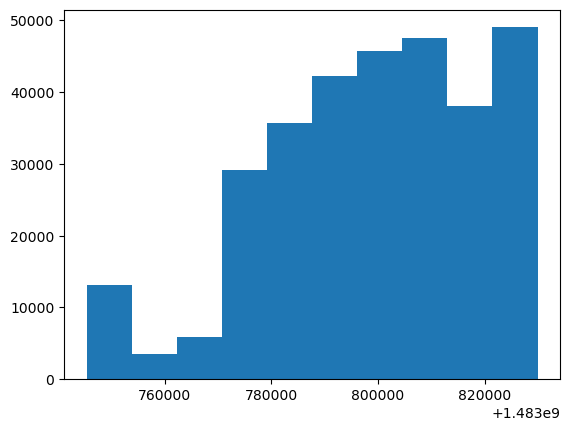

In [14]:
import matplotlib.pyplot as plt
plt.hist(interaction_matrix.timestamps_lte(tt).timestamps.values)

In [15]:
interaction_matrix.timestamps.values
t_80 = interaction_matrix.timestamps.values[int(0.8 * len(interaction_matrix.timestamps.values))]
t_validate_80 = interaction_matrix.timestamps.values[int(0.8 * 0.8 * len(interaction_matrix.timestamps.values))]
print(t_80, t_validate_80)

1483818916 1483808390


In [ ]:
#The last scenario being used is TimedLastItemPrediction after generating the results of StrongGeneralization scenario
#scenario = StrongGeneralization(frac_users_train=0.8, frac_interactions_in=0.8, validation=True)
scenario = TimedLastItemPrediction(t = t_80, t_validation = t_validate_80, validation=True)
scenario.split(interaction_matrix)

In [17]:
pipeline_builder = PipelineBuilder()
ok = (scenario._validation_data_in, scenario._validation_data_out)
pipeline_builder.set_data_from_scenario(scenario)


# Add the baseline algorithms
pipeline_builder.add_algorithm('ItemKNN', grid={'K': [100, 200, 400, 800]})
pipeline_builder.add_algorithm('EASE', grid={'l2': [10, 100, 1000], 'alpha': [0, 0.1, 0.5]})

# Add NDCG, Recall, and HR metrics to be evaluated at 10, 20, and 50
pipeline_builder.add_metric('NDCGK', [10, 20, 50])
pipeline_builder.add_metric('RecallK', [10, 20, 50])
pipeline_builder.add_metric('HitK', [10, 20, 50])

# Set the optimisation metric
pipeline_builder.set_optimisation_metric('RecallK', 20)

# Construct pipeline
pipeline = pipeline_builder.build()

# Debugging: Output the shape of the training data
#print(f"Training data shape: {im.shape}")

# Run pipeline, will first do optimisation, and then evaluation
pipeline.run()

/opt/conda/lib/python3.11/site-packages/recpack/pipelines/pipeline_builder.py:145: UserWarning: Grid parameter for add_algorithm function will be deprecated in favour of optimisation_info.
  warnings.warn(


  0%|          | 0/2 [00:00<?, ?it/s]

2024-08-07 20:04:42,984 - base - recpack - INFO - Fitting ItemKNN complete - Took 0.305s


/opt/conda/lib/python3.11/site-packages/recpack/algorithms/base.py:279: UserWarning: ItemKNN missing similar items for 3797 items.
  warnings.warn(f"{self.name} missing similar items for {missing} items.")
/opt/conda/lib/python3.11/site-packages/recpack/algorithms/base.py:127: UserWarning: ItemKNN failed to recommend any items for 1003 users
  warnings.warn(f"{self.name} failed to recommend any items " f"for {len(missing)} users")


2024-08-07 20:04:44,435 - base - recpack - INFO - Fitting ItemKNN complete - Took 0.197s


/opt/conda/lib/python3.11/site-packages/recpack/algorithms/base.py:279: UserWarning: ItemKNN missing similar items for 3797 items.
  warnings.warn(f"{self.name} missing similar items for {missing} items.")
/opt/conda/lib/python3.11/site-packages/recpack/algorithms/base.py:127: UserWarning: ItemKNN failed to recommend any items for 1003 users
  warnings.warn(f"{self.name} failed to recommend any items " f"for {len(missing)} users")


2024-08-07 20:04:46,667 - base - recpack - INFO - Fitting ItemKNN complete - Took 0.237s


/opt/conda/lib/python3.11/site-packages/recpack/algorithms/base.py:279: UserWarning: ItemKNN missing similar items for 3797 items.
  warnings.warn(f"{self.name} missing similar items for {missing} items.")
/opt/conda/lib/python3.11/site-packages/recpack/algorithms/base.py:127: UserWarning: ItemKNN failed to recommend any items for 1003 users
  warnings.warn(f"{self.name} failed to recommend any items " f"for {len(missing)} users")


2024-08-07 20:04:49,258 - base - recpack - INFO - Fitting ItemKNN complete - Took 0.206s


/opt/conda/lib/python3.11/site-packages/recpack/algorithms/base.py:279: UserWarning: ItemKNN missing similar items for 3797 items.
  warnings.warn(f"{self.name} missing similar items for {missing} items.")
/opt/conda/lib/python3.11/site-packages/recpack/algorithms/base.py:127: UserWarning: ItemKNN failed to recommend any items for 1003 users
  warnings.warn(f"{self.name} failed to recommend any items " f"for {len(missing)} users")


2024-08-07 20:04:52,122 - base - recpack - INFO - Fitting ItemKNN complete - Took 0.218s


/opt/conda/lib/python3.11/site-packages/recpack/algorithms/base.py:279: UserWarning: ItemKNN missing similar items for 3321 items.
  warnings.warn(f"{self.name} missing similar items for {missing} items.")
/opt/conda/lib/python3.11/site-packages/recpack/algorithms/base.py:127: UserWarning: ItemKNN failed to recommend any items for 1696 users
  warnings.warn(f"{self.name} failed to recommend any items " f"for {len(missing)} users")


2024-08-07 20:05:10,582 - base - recpack - INFO - Fitting EASE complete - Took 6.71s


/opt/conda/lib/python3.11/site-packages/recpack/algorithms/base.py:279: UserWarning: EASE missing similar items for 3797 items.
  warnings.warn(f"{self.name} missing similar items for {missing} items.")
/opt/conda/lib/python3.11/site-packages/recpack/algorithms/base.py:127: UserWarning: EASE failed to recommend any items for 1003 users
  warnings.warn(f"{self.name} failed to recommend any items " f"for {len(missing)} users")


2024-08-07 20:05:24,372 - base - recpack - INFO - Fitting EASE complete - Took 6.82s


/opt/conda/lib/python3.11/site-packages/recpack/algorithms/base.py:279: UserWarning: EASE missing similar items for 3797 items.
  warnings.warn(f"{self.name} missing similar items for {missing} items.")
/opt/conda/lib/python3.11/site-packages/recpack/algorithms/base.py:127: UserWarning: EASE failed to recommend any items for 1003 users
  warnings.warn(f"{self.name} failed to recommend any items " f"for {len(missing)} users")


2024-08-07 20:05:44,278 - base - recpack - INFO - Fitting EASE complete - Took 12.7s


/opt/conda/lib/python3.11/site-packages/recpack/algorithms/base.py:279: UserWarning: EASE missing similar items for 3797 items.
  warnings.warn(f"{self.name} missing similar items for {missing} items.")
/opt/conda/lib/python3.11/site-packages/recpack/algorithms/base.py:127: UserWarning: EASE failed to recommend any items for 1003 users
  warnings.warn(f"{self.name} failed to recommend any items " f"for {len(missing)} users")
/opt/conda/lib/python3.11/site-packages/recpack/algorithms/ease.py:89: RuntimeWarning: divide by zero encountered in divide
  w = 1 / np.diag(XTX) ** self.alpha


2024-08-07 20:06:10,695 - base - recpack - INFO - Fitting EASE complete - Took 19.0s


/opt/conda/lib/python3.11/site-packages/recpack/algorithms/ease.py:89: RuntimeWarning: divide by zero encountered in divide
  w = 1 / np.diag(XTX) ** self.alpha


2024-08-07 20:06:40,850 - base - recpack - INFO - Fitting EASE complete - Took 10.5s


/opt/conda/lib/python3.11/site-packages/recpack/algorithms/ease.py:89: RuntimeWarning: divide by zero encountered in divide
  w = 1 / np.diag(XTX) ** self.alpha


2024-08-07 20:07:13,305 - base - recpack - INFO - Fitting EASE complete - Took 10.9s


/opt/conda/lib/python3.11/site-packages/recpack/algorithms/ease.py:89: RuntimeWarning: divide by zero encountered in divide
  w = 1 / np.diag(XTX) ** self.alpha


2024-08-07 20:07:47,584 - base - recpack - INFO - Fitting EASE complete - Took 10.7s


/opt/conda/lib/python3.11/site-packages/recpack/algorithms/ease.py:89: RuntimeWarning: divide by zero encountered in divide
  w = 1 / np.diag(XTX) ** self.alpha


2024-08-07 20:08:19,982 - base - recpack - INFO - Fitting EASE complete - Took 11.1s


/opt/conda/lib/python3.11/site-packages/recpack/algorithms/ease.py:89: RuntimeWarning: divide by zero encountered in divide
  w = 1 / np.diag(XTX) ** self.alpha


2024-08-07 20:08:52,935 - base - recpack - INFO - Fitting EASE complete - Took 10.7s
2024-08-07 20:09:22,346 - base - recpack - INFO - Fitting EASE complete - Took 7.41s


/opt/conda/lib/python3.11/site-packages/recpack/algorithms/base.py:279: UserWarning: EASE missing similar items for 3321 items.
  warnings.warn(f"{self.name} missing similar items for {missing} items.")
/opt/conda/lib/python3.11/site-packages/recpack/algorithms/base.py:127: UserWarning: EASE failed to recommend any items for 1696 users
  warnings.warn(f"{self.name} failed to recommend any items " f"for {len(missing)} users")


In [18]:
pipeline.get_metrics()

,NDCGK_10,NDCGK_20,NDCGK_50,RecallK_10,RecallK_20,RecallK_50,HitK_10,HitK_20,HitK_50
"ItemKNN(K=200,normalize_X=False,normalize_sim=False,pop_discount=None,similarity=cosine)",0.087391,0.110677,0.132117,0.171025,0.262963,0.370412,0.171025,0.262963,0.370412
"EASE(alpha=0,density=None,l2=100)",0.092674,0.113802,0.136584,0.183019,0.266525,0.380061,0.183019,0.266525,0.380061
